# Examples from Privug Paper

In [1]:
import src as SOGA
import numpy as np

#### eval.py

In [4]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Original Paper/eval.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist1 = SOGA.start_SOGA(cfg)

In [5]:
output_dist1.gm.mean()

array([483000., 493000., 443000., 423000., 493000., 493000., 523000.,
       493000., 473000., 403000., 472000.])

In [6]:
np.sqrt(output_dist1.gm.cov()[0,0])

94.86832980505137

#### eval2.py

In [7]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Original Paper/eval2.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist2 = SOGA.start_SOGA(cfg)

In [8]:
output_dist2.gm.mean()

array([483000., 493000., 443000., 423000., 493000., 493000., 523000.,
       493000., 473000., 403000., 472000., 473000., 423000., 433000.,
       453000., 463000., 423000., 463000., 323000., 373000., 423000.,
       425000., 448500.])

#### eval3.py

In [9]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Original Paper/eval3.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist3 = SOGA.start_SOGA(cfg)

output_dist3.gm.mean()

array([483000., 493000., 443000., 423000., 493000., 493000., 523000.,
       493000., 473000., 403000., 472000., 553000., 463000., 523000.,
       543000., 553000., 463000., 593000., 463000., 553000., 453000.,
       516000., 618000., 568000., 628000., 548000., 598000., 628000.,
       318000., 538000., 618000., 638000., 570000., 734000., 624000.,
       674000., 664000., 654000., 624000., 754000., 654000., 574000.,
       824000., 678000., 473000., 423000., 433000., 453000., 463000.,
       423000., 463000., 323000., 373000., 423000., 425000., 448500.,
       559000.])

#### plot

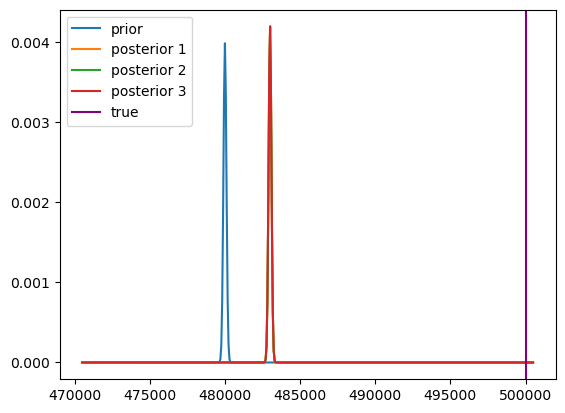

In [10]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(470500,500500,500)

prior = norm.pdf(x, loc=480000, scale=100)
posterior1 = output_dist1.gm.marg_pdf(x, 0)
posterior2 = output_dist2.gm.marg_pdf(x, 0)
posterior3 = output_dist3.gm.marg_pdf(x, 0)

plt.plot(x, prior, label='prior')
plt.plot(x, posterior1, label='posterior 1')
plt.plot(x, posterior2, label='posterior 2')
plt.plot(x, posterior3, label='posterior 3')
plt.axvline(x = 500_000, color = 'purple', label= 'true')


plt.legend()

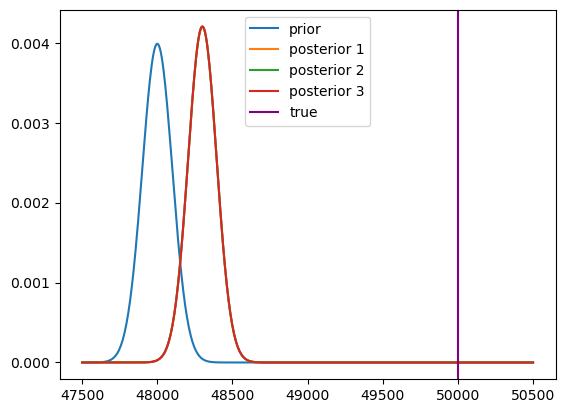

In [11]:
x = np.linspace(47500,50500,500)

def scaled_posterior(x, dist, idx):
    mean = dist.gm.mean()[idx]/10
    std = np.sqrt(dist.gm.cov()[idx,idx])
    return norm.pdf(x, loc=mean, scale=std)

prior = norm.pdf(x, loc=48000, scale=100)
posterior1 = scaled_posterior(x, output_dist1, 0)
posterior2 = scaled_posterior(x, output_dist2, 0)
posterior3 = scaled_posterior(x, output_dist3, 0)

plt.plot(x, prior, label='prior')
plt.plot(x, posterior1, label='posterior 1')
plt.plot(x, posterior2, label='posterior 2')
plt.plot(x, posterior3, label='posterior 3')
plt.axvline(x = 50000, color = 'purple', label= 'true')


plt.legend()

#### eval1_dp.soga

In [12]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Original Paper/eval1_dp.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist1 = SOGA.start_SOGA(cfg)

In [13]:
output_dist1.gm.mean()

array([  3000., 480000., 490000., 440000., 420000., 490000., 490000.,
       520000., 490000., 470000., 400000., 472000.])

#### eval2_dp.soga

In [14]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Original Paper/eval2_dp.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist2 = SOGA.start_SOGA(cfg)

In [15]:
output_dist2.gm.mean()

array([  3000.,  23000.,  13000., 480000., 490000., 440000., 420000.,
       490000., 490000., 520000., 490000., 470000., 400000., 472000.,
       450000., 400000., 410000., 430000., 440000., 400000., 440000.,
       300000., 350000., 400000., 425000., 448500.])

#### eval3_dp.soga

In [16]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Original Paper/eval3_dp.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist3 = SOGA.start_SOGA(cfg)

In [17]:
output_dist3.gm.mean()

array([  3000.,  13000.,  23750., 480000., 490000., 440000., 420000.,
       490000., 490000., 520000., 490000., 470000., 400000., 472000.,
       553000., 463000., 523000., 543000., 553000., 463000., 593000.,
       463000., 553000., 453000., 516000., 580000., 530000., 590000.,
       510000., 560000., 590000., 280000., 500000., 580000., 600000.,
       532000., 680000., 570000., 620000., 610000., 600000., 570000.,
       700000., 600000., 520000., 770000., 624000., 450000., 400000.,
       410000., 430000., 440000., 400000., 440000., 300000., 350000.,
       400000., 402000., 448500., 559000.])

#### plot

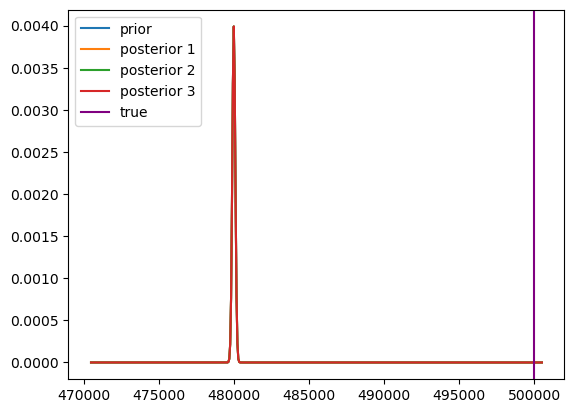

In [18]:
#from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(470500,500500,500)

prior = norm.pdf(x, loc=480000, scale=100)
posterior1 = output_dist1.gm.marg_pdf(x, 1)
posterior2 = output_dist2.gm.marg_pdf(x, 3)
posterior3 = output_dist3.gm.marg_pdf(x, 3)

plt.plot(x, prior, label='prior')
plt.plot(x, posterior1, label='posterior 1')
plt.plot(x, posterior2, label='posterior 2')
plt.plot(x, posterior3, label='posterior 3')
plt.axvline(x = 500_000, color = 'purple', label= 'true')


plt.legend()

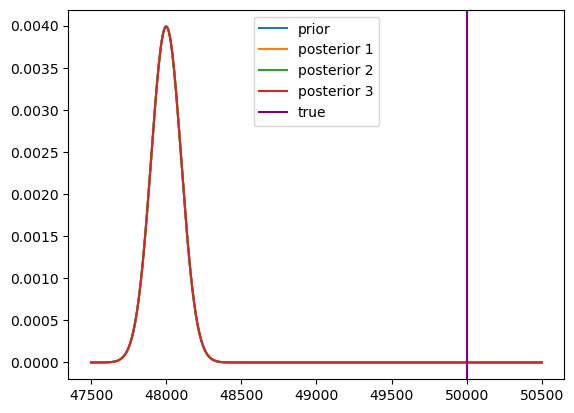

In [19]:
x = np.linspace(47500,50500,500)


prior = norm.pdf(x, loc=48000, scale=100)
posterior1 = scaled_posterior(x, output_dist1, 1)
posterior2 = scaled_posterior(x, output_dist2, 3)
posterior3 = scaled_posterior(x, output_dist3, 3)

plt.plot(x, prior, label='prior')
plt.plot(x, posterior1, label='posterior 1')
plt.plot(x, posterior2, label='posterior 2')
plt.plot(x, posterior3, label='posterior 3')
plt.axvline(x = 50000, color = 'purple', label= 'true')


plt.legend()

# New case studies

### Experiment 1

prior = same for everyone (mean of the population + uncertainty)

posterior1 = after observing the mean for the male population

posterior2 = after observing the mean for the male population (male + female) and the mean for age group 21-30

posterior3 = after observing the mean for the male population (male + female), the mean for age group 21-30 and a single individual 


In [20]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 1/posterior1.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist1 = SOGA.start_SOGA(cfg)

In [21]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 1/posterior2.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist2 = SOGA.start_SOGA(cfg)

In [22]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 1/posterior3.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist3 = SOGA.start_SOGA(cfg)

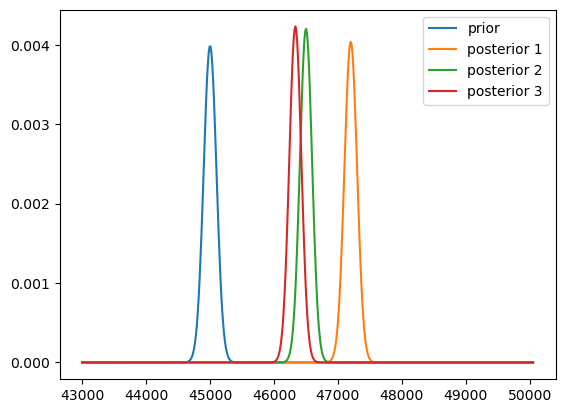

In [23]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def scaled_posterior(x, dist, idx):
    mean = dist.gm.mean()[idx]/10
    std = np.sqrt(dist.gm.cov()[idx,idx])
    return norm.pdf(x, loc=mean, scale=std)

x = np.linspace(43000,50050,500)

prior = norm.pdf(x, loc=45000, scale=100)
posterior1 = scaled_posterior(x, output_dist1, 0)
posterior2 = scaled_posterior(x, output_dist2, 0)
posterior3 = scaled_posterior(x, output_dist3, 0)

plt.plot(x, prior, label='prior')
plt.plot(x, posterior1, label='posterior 1')
plt.plot(x, posterior2, label='posterior 2')
plt.plot(x, posterior3, label='posterior 3')
#plt.axvline(x = 500_000, color = 'purple', label= 'true')


plt.legend()

## Experiment 2

As before but added Gaussian noise to observation of the averages

In [22]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 2/posterior1.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist1 = SOGA.start_SOGA(cfg)

In [23]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 2/posterior2.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist2 = SOGA.start_SOGA(cfg)

In [24]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 2/posterior3.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist3 = SOGA.start_SOGA(cfg)

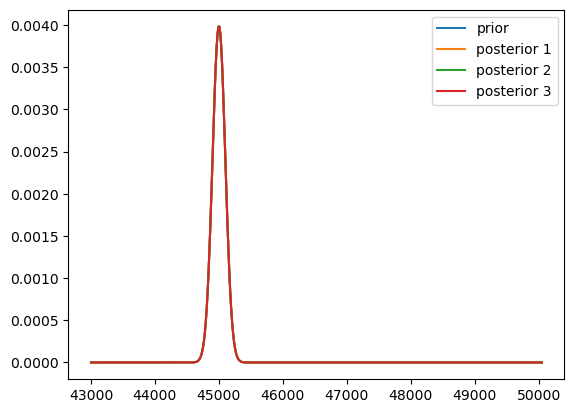

In [25]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def scaled_posterior(x, dist, idx):
    mean = dist.gm.mean()[idx]/10
    std = np.sqrt(dist.gm.cov()[idx,idx])
    return norm.pdf(x, loc=mean, scale=std)

x = np.linspace(43000,50050,500)

prior = norm.pdf(x, loc=45000, scale=100)
posterior1 = scaled_posterior(x, output_dist1, 0)
posterior2 = scaled_posterior(x, output_dist2, 0)
posterior3 = scaled_posterior(x, output_dist3, 0)

plt.plot(x, prior, label='prior')
plt.plot(x, posterior1, label='posterior 1')
plt.plot(x, posterior2, label='posterior 2')
plt.plot(x, posterior3, label='posterior 3')
#plt.axvline(x = 500_000, color = 'purple', label= 'true')


plt.legend()

## Experiment 3

As before but added Laplacian noise to observation of the averages

In [26]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 3/posterior1.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist1 = SOGA.start_SOGA(cfg)

In [27]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 3/posterior2.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist2 = SOGA.start_SOGA(cfg)

In [28]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 3/posterior3.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist3 = SOGA.start_SOGA(cfg)

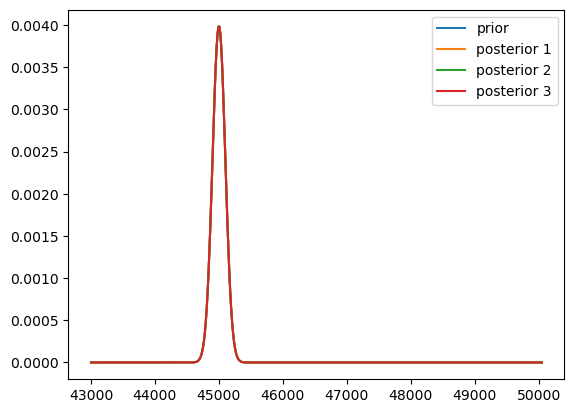

In [30]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def scaled_posterior(x, dist, idx):
    mean = dist.gm.mean()[idx]/10
    std = np.sqrt(dist.gm.cov()[idx,idx])
    return norm.pdf(x, loc=mean, scale=std)

x = np.linspace(43000,50050,500)

prior = norm.pdf(x, loc=45000, scale=100)
posterior1 = scaled_posterior(x, output_dist1, 0)
posterior2 = scaled_posterior(x, output_dist2, 0)
posterior3 = scaled_posterior(x, output_dist3, 0)

plt.plot(x, prior, label='prior')
plt.plot(x, posterior1, label='posterior 1')
plt.plot(x, posterior2, label='posterior 2')
plt.plot(x, posterior3, label='posterior 3')
#plt.axvline(x = 500_000, color = 'purple', label= 'true')


plt.legend()

## Experiment 4

prior = gauss(450k, 50k) for everybody

posterior1 = observing label on whether an individual is above or below the mean

posterior2 = observing 3 labels (<400k, 400k<<500k, >500k)

In [31]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 4/masking-2label.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist1 = SOGA.start_SOGA(cfg)

output_dist1.gm.mean()

array([4.10105772e+05, 4.89894228e+05, 4.89894228e+05, 4.10105772e+05,
       4.89894228e+05, 4.10105772e+05, 4.10105772e+05, 4.89894228e+05,
       4.89894228e+05, 4.10105772e+05, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [32]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/Experiment 4/masking-3label.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist2 = SOGA.start_SOGA(cfg)

output_dist2.gm.mean()

array([3.73743236e+05, 4.51405661e+05, 5.21667902e+05, 3.73743236e+05,
       4.51405661e+05, 3.73743236e+05, 5.21667902e+05, 4.51405661e+05,
       4.51405661e+05, 3.73743236e+05, 0.00000000e+00, 1.00000000e+00,
       2.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00])

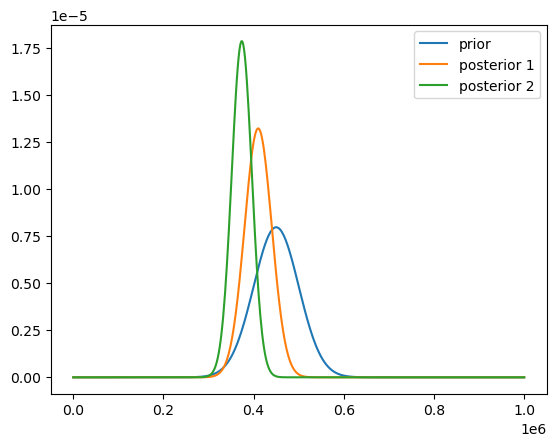

In [33]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def scaled_posterior(x, dist, idx):
    mean = dist.gm.mean()[idx]/10
    std = np.sqrt(dist.gm.cov()[idx,idx])
    return norm.pdf(x, loc=mean, scale=std)

x = np.linspace(0,1000000,500)

prior = norm.pdf(x, loc=450000, scale=50000)
posterior1 = output_dist1.gm.marg_pdf(x, 0)
posterior2 = output_dist2.gm.marg_pdf(x, 0)
#posterior3 = scaled_posterior(x, output_dist3, 0)

plt.plot(x, prior, label='prior')
plt.plot(x, posterior1, label='posterior 1')
plt.plot(x, posterior2, label='posterior 2')
#plt.plot(x, posterior3, label='posterior 3')
#plt.axvline(x = 500_000, color = 'purple', label= 'true')


plt.legend()

### Hierarchical

The mean of each individual is a Gaussian. Observing 1, 3 or 5 income shifts the distribution of the mean

In [63]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/HIerarchical/new5-1.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist51 = SOGA.start_SOGA(cfg)

output_dist51.gm.mean()

array([435000., 420000., 435000., 435000., 435000., 435000., 435000.,
       435000., 435000., 435000., 435000.])

In [ ]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/HIerarnew5-3.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist53 = SOGA.start_SOGA(cfg)

output_dist53.gm.mean()

In [ ]:
compiledFile=SOGA.compile2SOGA('programs/SOGA/Privug/new5-5.soga')
cfg = SOGA.produce_cfg(compiledFile)
output_dist55 = SOGA.start_SOGA(cfg)

output_dist55.gm.mean()

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def scaled_posterior(x, dist, idx):
    mean = dist.gm.mean()[idx]/10
    std = np.sqrt(dist.gm.cov()[idx,idx])
    return norm.pdf(x, loc=mean, scale=std)

x = np.linspace(43000,47000,500)

prior = norm.pdf(x, loc=45000, scale=200)
posterior51 = scaled_posterior(x, output_dist51, 0)
posterior53 = scaled_posterior(x, output_dist53, 0)
posterior55 = scaled_posterior(x, output_dist55, 0)

plt.plot(x, prior, label='prior')
plt.plot(x, posterior51, label='mean 1obs')
plt.plot(x, posterior53, label='mean 3obs')
plt.plot(x, posterior55, label='mean 5obs')


plt.legend()